# Exploratory Data Analysis (EDA) on Life Expectancy Dataset
## Objective:

This notebook aims to conduct an Exploratory Data Analysis (EDA) on the dataset provided by the World Health Organization (WHO) and made available via Kaggle. The dataset contains information about life expectancy, health factors, and socio-economic metrics for multiple countries over several years.

First we want to merge the two datasets (un-education-data.csv and life-expactancy-data.csv). Then those steps are planed:

1) <mark>Filtering and aggregating</mark> the education dataset to extract primary, lower secondary and upper secodary enrollment.

2) <mark>Add a new column</mark> for the total enrollment by summing the three educatoin-related columns.

3) <mark>Merging the datasets</mark> on Country and Year

4) <mark>Data investigation / cleaning</mark> for merged datasets

4) <mark>EDA</mark> process.

## Filtering and aggregation

In [66]:
import pandas as pd

life_expectancy_data = pd.read_csv("data/raw/life-expectancy-data.csv")
education_data = pd.read_csv("data/cleaned/01_cleaned_education_data.csv")

First we filter relevant information in educatoin dataset

In [67]:
education_data = education_data[
    education_data["Series"].isin([
        "Students enrolled in primary education (thousands)",
        "Students enrolled in lower secondary education (thousands)",
        "Students enrolled in upper secondary education (thousands)"
    ])
]
education_data.drop(columns=["Footnotes"], inplace=True)
education_data.head()

Number            Region_Country_Area  Year  \
0        1  Total, all countries or areas  2005   
3        1  Total, all countries or areas  2005   
6        1  Total, all countries or areas  2005   
9        1  Total, all countries or areas  2010   
12       1  Total, all countries or areas  2010   

                                               Series     Value  
0   Students enrolled in primary education (thousa...  678907.0  
3   Students enrolled in lower secondary education...  309665.0  
6   Students enrolled in upper secondary education...  199767.0  
9   Students enrolled in primary education (thousa...  697253.0  
12  Students enrolled in lower secondary education...  315613.0

Now we exclude region and areas before joining process and we consider only countries

In [68]:
region_and_area_list = [
    "Total, all countries or areas", "Northern Africa", "Sub-Saharan Africa",
    "Northern America", "Latin America & the Caribbean", "Central Asia",
    "Eastern Asia", "South-eastern Asia", "Southern Asia", "Western Asia",
    "Europe", "Oceania", "LLDCs", "LDC", "SIDS", "Australia and New Zealand"
]

filtered_education_data = education_data[~education_data["Region_Country_Area"].isin(region_and_area_list)]
filtered_education_data.head()

Number Region_Country_Area  Year  \
468       4         Afghanistan  2005   
471       4         Afghanistan  2005   
474       4         Afghanistan  2005   
477       4         Afghanistan  2010   
480       4         Afghanistan  2010   

                                                Series   Value  
468  Students enrolled in primary education (thousa...  4319.0  
471  Students enrolled in lower secondary education...   461.0  
474  Students enrolled in upper secondary education...   190.0  
477  Students enrolled in primary education (thousa...  5279.0  
480  Students enrolled in lower secondary education...  1477.0

Pivoting the filtered_education_data set to create separate columns for enrollment level

In [69]:
education_pivot = filtered_education_data.pivot_table(
    index=["Region_Country_Area", "Year"], #Group by those attributes
    columns="Series",
    values="Value",
    aggfunc="sum"
).reset_index()
education_pivot.head()

Series Region_Country_Area  Year  \
0              Afghanistan  2005   
1              Afghanistan  2010   
2              Afghanistan  2015   
3              Afghanistan  2018   
4              Afghanistan  2019   

Series  Students enrolled in lower secondary education (thousands)  \
0                                                   461.0            
1                                                  1477.0            
2                                                  1669.0            
3                                                  1983.0            
4                                                  2067.0            

Series  Students enrolled in primary education (thousands)  \
0                                                  4319.0    
1                                                  5279.0    
2                                                  6199.0    
3                                                  6545.0    
4                                                  6778.0    

Series  Students enrolled in upper secondary education (thousands)  
0                                                   190.0           
1                                                   567.0           
2                                                   982.0           
3                                                  1081.0           
4                                                     NaN

Next we drop rows which contains NAN

In [70]:
nan_row= education_pivot[education_pivot.isnull().any(axis=1)]
print(f"Number of rows with NaN values: {len(nan_row)}")
#nan_row.head()
education_pivot = education_pivot.dropna()
nan_sum = education_pivot.isnull().sum() 
print(f"Number of rows with NaN values after dropping them: {nan_sum}")

Number of rows with NaN values: 189
Number of rows with NaN values after dropping them: Series
Region_Country_Area                                           0
Year                                                          0
Students enrolled in lower secondary education (thousands)    0
Students enrolled in primary education (thousands)            0
Students enrolled in upper secondary education (thousands)    0
dtype: int64


Remane columns for more clarity

In [71]:
education_pivot.rename(
    columns= {
        "Region_Country_Area" : "Country",
        "Students enrolled in lower secondary education (thousands)" : "Lower_Secondary_Enrollment (tsd.)",
        "Students enrolled in primary education (thousands)" : "Primary_Enrollment (tsd.)",
        "Students enrolled in upper secondary education (thousands)" : "Upper_Secondary_Enrollment (tsd.)",
    }, 
    inplace=True
)
education_pivot.head()

Series      Country  Year  Lower_Secondary_Enrollment (tsd.)  \
0       Afghanistan  2005                              461.0   
1       Afghanistan  2010                             1477.0   
2       Afghanistan  2015                             1669.0   
3       Afghanistan  2018                             1983.0   
5           Albania  2005                              251.0   

Series  Primary_Enrollment (tsd.)  Upper_Secondary_Enrollment (tsd.)  
0                          4319.0                              190.0  
1                          5279.0                              567.0  
2                          6199.0                              982.0  
3                          6545.0                             1081.0  
5                           238.0                              156.0

Now we add new column for the total enrollments

## Add a new column

In [72]:
education_pivot["Total_Enrollment"] = (
    education_pivot["Primary_Enrollment (tsd.)"] +
    education_pivot["Lower_Secondary_Enrollment (tsd.)"] + 
    education_pivot["Upper_Secondary_Enrollment (tsd.)"] 
)
education_pivot.head()

Series      Country  Year  Lower_Secondary_Enrollment (tsd.)  \
0       Afghanistan  2005                              461.0   
1       Afghanistan  2010                             1477.0   
2       Afghanistan  2015                             1669.0   
3       Afghanistan  2018                             1983.0   
5           Albania  2005                              251.0   

Series  Primary_Enrollment (tsd.)  Upper_Secondary_Enrollment (tsd.)  \
0                          4319.0                              190.0   
1                          5279.0                              567.0   
2                          6199.0                              982.0   
3                          6545.0                             1081.0   
5                           238.0                              156.0   

Series  Total_Enrollment  
0                 4970.0  
1                 7323.0  
2                 8850.0  
3                 9609.0  
5                  645.0

Changing datatypes

In [73]:
education_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 715 entries, 0 to 901
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            715 non-null    object 
 1   Year                               715 non-null    int64  
 2   Lower_Secondary_Enrollment (tsd.)  715 non-null    float64
 3   Primary_Enrollment (tsd.)          715 non-null    float64
 4   Upper_Secondary_Enrollment (tsd.)  715 non-null    float64
 5   Total_Enrollment                   715 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 39.1+ KB


In [74]:
print(education_pivot.columns)

Index(['Country', 'Year', 'Lower_Secondary_Enrollment (tsd.)',
       'Primary_Enrollment (tsd.)', 'Upper_Secondary_Enrollment (tsd.)',
       'Total_Enrollment'],
      dtype='object', name='Series')


In [75]:
education_pivot["Primary_Enrollment (tsd.)"] = education_pivot["Primary_Enrollment (tsd.)"].astype(int)
education_pivot["Lower_Secondary_Enrollment (tsd.)"] = education_pivot["Lower_Secondary_Enrollment (tsd.)"].astype(int)
education_pivot["Upper_Secondary_Enrollment (tsd.)"] = education_pivot["Upper_Secondary_Enrollment (tsd.)"].astype(int)
education_pivot["Total_Enrollment"] = education_pivot["Total_Enrollment"].astype(int)


In [76]:
education_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 715 entries, 0 to 901
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Country                            715 non-null    object
 1   Year                               715 non-null    int64 
 2   Lower_Secondary_Enrollment (tsd.)  715 non-null    int64 
 3   Primary_Enrollment (tsd.)          715 non-null    int64 
 4   Upper_Secondary_Enrollment (tsd.)  715 non-null    int64 
 5   Total_Enrollment                   715 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 39.1+ KB


## Merging the datasets

Now we standardize column names in both datasets for merging

In [77]:
education_pivot["Country"] = education_pivot["Country"].str.strip()
life_expectancy_data["Country"] = life_expectancy_data["Country"].str.strip()

Merging..

In [78]:
merged_data = pd.merge (
    life_expectancy_data,
    education_pivot,
    on=["Country", "Year"],
    how="inner"
)
merged_data.shape
merged_data.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2010  Developing              58.8            279.0   
2  Afghanistan  2005  Developing              57.3            291.0   
3      Albania  2015  Developing              77.8             74.0   
4      Albania  2010  Developing              76.2             91.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             74     0.01               79.679367         66.0      1989  ...   
2             85     0.02                1.388648         66.0      1296  ...   
3              0     4.60              364.975229         99.0         0  ...   
4              1     5.28               41.822757         99.0        10  ...   

           GDP  Population   thinness  1-19 years   thinness 5-9 years  \
0   584.259210  33736494.0                   17.2                 17.3   
1   553.328940   2883167.0                   18.4                 18.4   
2    25.294130    257798.0                   19.3                 19.5   
3  3954.227830     28873.0                    1.2                  1.3   
4   494.358832    291321.0                    1.4                  1.5   

   Income composition of resources  Schooling  \
0                            0.479       10.1   
1                            0.448        9.2   
2                            0.396        7.9   
3                            0.762       14.2   
4                            0.725       12.5   

   Lower_Secondary_Enrollment (tsd.)  Primary_Enrollment (tsd.)  \
0                               1669                       6199   
1                               1477                       5279   
2                                461                       4319   
3                                175                        188   
4                                215                        225   

   Upper_Secondary_Enrollment (tsd.)  Total_Enrollment  
0                                982              8850  
1                                567              7323  
2                                190              4970  
3                                140               503  
4                                141               581  

[5 rows x 26 columns]

Dropping columns that are not needed

In [79]:
merged_data = merged_data.drop(columns=["Schooling"])

## Data investigation / cleaning

In [80]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            432 non-null    object 
 1   Year                               432 non-null    int64  
 2   Status                             432 non-null    object 
 3   Life expectancy                    432 non-null    float64
 4   Adult Mortality                    432 non-null    float64
 5   infant deaths                      432 non-null    int64  
 6   Alcohol                            314 non-null    float64
 7   percentage expenditure             432 non-null    float64
 8   Hepatitis B                        389 non-null    float64
 9   Measles                            432 non-null    int64  
 10   BMI                               428 non-null    float64
 11  under-five deaths                  432 non-null    int64  

In [81]:
nan_row_merged = merged_data.isna().sum()
merged_data = merged_data.dropna()
nan_sum_m = merged_data.isna().sum()
print(f"Number of NaN rows after dropping {nan_sum_m}")

Number of NaN rows after dropping Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                                0
Total expenditure                    0
Diphtheria                           0
 HIV/AIDS                            0
GDP                                  0
Population                           0
 thinness  1-19 years                0
 thinness 5-9 years                  0
Income composition of resources      0
Lower_Secondary_Enrollment (tsd.)    0
Primary_Enrollment (tsd.)            0
Upper_Secondary_Enrollment (tsd.)    0
Total_Enrollment              

Check if negative values exist

In [82]:
exclude_list = ["Country"]
all_negative_values = ~merged_data.isin(exclude_list) < 0
rows_with_negative_values = merged_data[all_negative_values.any(axis=1)]
print(rows_with_negative_values)

Empty DataFrame
Columns: [Country, Year, Status, Life expectancy , Adult Mortality, infant deaths, Alcohol, percentage expenditure, Hepatitis B, Measles ,  BMI , under-five deaths , Polio, Total expenditure, Diphtheria ,  HIV/AIDS, GDP, Population,  thinness  1-19 years,  thinness 5-9 years, Income composition of resources, Lower_Secondary_Enrollment (tsd.), Primary_Enrollment (tsd.), Upper_Secondary_Enrollment (tsd.), Total_Enrollment]
Index: []

[0 rows x 25 columns]


## EDA

In [83]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import missingno as msno

🌍 Dataset Columns Description

1) **Country** : The name of the country for which the data is recorded.

2) **Year** : The year for which the data was recorded.

3) **Life_expectancy**: The average number of years a newborn is expected to live, assuming current mortality rates remain constant.

4) **Adult_Mortality**: The probability of dying between the ages of 15 and 60 per 1000 population.

5) **Infant_Deaths**: Number of deaths of infants under the age of 1 per 1000 live births.

6) **Alcohol**: Per capita alcohol consumption (in liters) for people aged 15+.

7) **Percentage_expenditure**: Government expenditure on health as a percentage of GDP.

8) **Hepatitis_B**: Percentage of people vaccinated against Hepatitis B.

9) **Measles**: Number of reported measles cases per year.

10) **BMI**: Average Body Mass Index (BMI) for the population.

11) **Under_five_deaths**: Number of deaths of children under 5 years of age per 1000 live births.

12) **Polio**: Percentage of people vaccinated against Polio.

13) **Total_expenditure**: Total health expenditure as a percentage of GDP.

14) **Diphtheria**: Percentage of people vaccinated against Diphtheria.

15) **HIV/AIDS**: Deaths per 1000 live births due to HIV/AIDS.

16) **GDP**: Gross Domestic Product per capita in USD.

17) **Population**: Total population of the country.

18) **Thinness 1-19 years**: The prevalence of thinness (underweight) among individuals aged 1 to 19 years.

19) **Thinness 5-9 years**:  the prevalence of thinness (underweight) specifically for children aged 5 to 9 years.

20) **Income Composition of Resources**: Index value indicating the equitable distribution of income and resources in a population.

🎓 Education Columns

21) **Lower_Secondary_Enrollment (tsd.)**: Number of enrolled stundets.

22) **Primary_Enrollment (tsd.)**: Number of enrolled stundets.

23) **Upper_Secondary_Enrollment (tsd.)**: Number of enrolled stundets.

24) **Total_Enrollment**: Total number of student enrolled in different levels

In [84]:
merged_data.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count   222.000000        222.000000       222.000000     222.000000   
mean   2008.216216         69.606757       152.900901      31.423423   
std       2.800793          8.470364       118.231191     103.871270   
min    2005.000000         44.500000         2.000000       0.000000   
25%    2005.000000         65.175000        66.250000       1.000000   
50%    2010.000000         72.400000       137.500000       3.000000   
75%    2010.000000         74.900000       212.750000      23.000000   
max    2015.000000         88.000000       675.000000    1200.000000   

          Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  222.000000              222.000000   222.000000     222.000000   
mean     4.734955              629.338662    81.837838    2274.103604   
std      3.988342             1389.595159    23.172788   11671.172422   
min      0.010000                0.108056     5.000000       0.000000   
25%      0.930000               34.824551    79.000000       0.000000   
50%      4.240000              146.178597    92.000000      12.500000   
75%      7.520000              493.084812    96.000000     311.000000   
max     15.520000             8649.674911    99.000000  118712.000000   

             BMI   under-five deaths   ...    HIV/AIDS           GDP  \
count  222.000000          222.000000  ...  222.000000    222.000000   
mean    36.503604           43.378378  ...    1.524324   4905.765879   
std     20.542964          144.178186  ...    4.325160   9101.228766   
min      2.100000            0.000000  ...    0.100000      8.376432   
25%     17.600000            1.000000  ...    0.100000    463.625372   
50%     43.200000            4.000000  ...    0.100000   1350.758695   
75%     55.300000           33.000000  ...    0.600000   4457.105359   
max     74.100000         1600.000000  ...   34.800000  48538.587760   

         Population   thinness  1-19 years   thinness 5-9 years  \
count  2.220000e+02             222.000000           222.000000   
mean   1.498186e+07               5.023874             5.040541   
std    3.696455e+07               4.807631             4.792800   
min    4.300000e+01               0.100000             0.100000   
25%    2.821100e+05               1.700000             1.700000   
50%    1.749488e+06               3.000000             3.100000   
75%    8.219566e+06               7.375000             7.550000   
max    2.425241e+08              27.000000            27.800000   

       Income composition of resources  Lower_Secondary_Enrollment (tsd.)  \
count                       222.000000                         222.000000   
mean                          0.633694                        1849.671171   
std                           0.175642                        5785.599528   
min                           0.000000                           4.000000   
25%                           0.506500                         163.000000   
50%                           0.679000                         392.500000   
75%                           0.747500                        1524.250000   
max                           0.907000                       59421.000000   

       Primary_Enrollment (tsd.)  Upper_Secondary_Enrollment (tsd.)  \
count                 222.000000                         222.000000   
mean                 4005.198198                        1258.175676   
std                 12246.886422                        4591.472591   
min                     9.000000                           1.000000   
25%                   291.000000                          86.500000   
50%                  1041.000000                         237.500000   
75%                  3486.750000                         989.500000   
max                138414.000000                       48266.000000   

       Total_Enrollment  
count        222.000000  
mean        7113.045045  
std        22428.442263  
min           16

In [85]:
merged_data.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2010  Developing              58.8            279.0   
2  Afghanistan  2005  Developing              57.3            291.0   
3      Albania  2015  Developing              77.8             74.0   
4      Albania  2010  Developing              76.2             91.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             74     0.01               79.679367         66.0      1989  ...   
2             85     0.02                1.388648         66.0      1296  ...   
3              0     4.60              364.975229         99.0         0  ...   
4              1     5.28               41.822757         99.0        10  ...   

    HIV/AIDS          GDP  Population   thinness  1-19 years  \
0        0.1   584.259210  33736494.0                   17.2   
1        0.1   553.328940   2883167.0                   18.4   
2        0.1    25.294130    257798.0                   19.3   
3        0.1  3954.227830     28873.0                    1.2   
4        0.1   494.358832    291321.0                    1.4   

    thinness 5-9 years  Income composition of resources  \
0                 17.3                            0.479   
1                 18.4                            0.448   
2                 19.5                            0.396   
3                  1.3                            0.762   
4                  1.5                            0.725   

   Lower_Secondary_Enrollment (tsd.)  Primary_Enrollment (tsd.)  \
0                               1669                       6199   
1                               1477                       5279   
2                                461                       4319   
3                                175                        188   
4                                215                        225   

   Upper_Secondary_Enrollment (tsd.)  Total_Enrollment  
0                                982              8850  
1                                567              7323  
2                                190              4970  
3                                140               503  
4                                141               581  

[5 rows x 25 columns]

In [86]:
merged_data.tail()

Country  Year      Status  Life expectancy   Adult Mortality  \
422     Uruguay  2005  Developing              75.7            123.0   
424  Uzbekistan  2010  Developing              68.3            183.0   
425  Uzbekistan  2005  Developing              67.3            192.0   
427     Vanuatu  2010  Developing              71.0            145.0   
431    Zimbabwe  2013  Developing              58.0            399.0   

     infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
422              1     6.35              152.544840         96.0         0   
424             20     2.73              119.457115         99.0       117   
425             24     1.78               40.133421         99.0       737   
427              0     0.91              471.862653         62.0         0   
431             25     6.39               10.666707         95.0         0   

     ...   HIV/AIDS          GDP  Population   thinness  1-19 years  \
422  ...        0.1   522.951116   3325612.0                    1.6   
424  ...        0.2  1377.821400    285624.0                    3.0   
425  ...        0.3   546.776852     26167.0                    3.2   
427  ...        0.1  2965.824340    236295.0                    1.5   
431  ...        6.8   111.227396    155456.0                    6.2   

      thinness 5-9 years  Income composition of resources  \
422                  1.6                            0.753   
424                  3.1                            0.657   
425                  3.2                            0.620   
427                  1.4                            0.590   
431                  6.0                            0.488   

     Lower_Secondary_Enrollment (tsd.)  Primary_Enrollment (tsd.)  \
422                                173                        366   
424                               2850                       1971   
425                               3143                       2383   
427                                 14                         42   
431                                467                       2663   

     Upper_Secondary_Enrollment (tsd.)  Total_Enrollment  
422                                150               689  
424                               1599              6420  
425                               1373              6899  
427                                  6                62  
431                                491              3621  

[5 rows x 25 columns]

In [87]:
merged_data.shape

(222, 25)

In [129]:
import os
plotfolder = "EDA_plots"
if not os.path.exists(plotfolder):
    os.makedirs(plotfolder)

<function matplotlib.pyplot.show(close=None, block=None)>

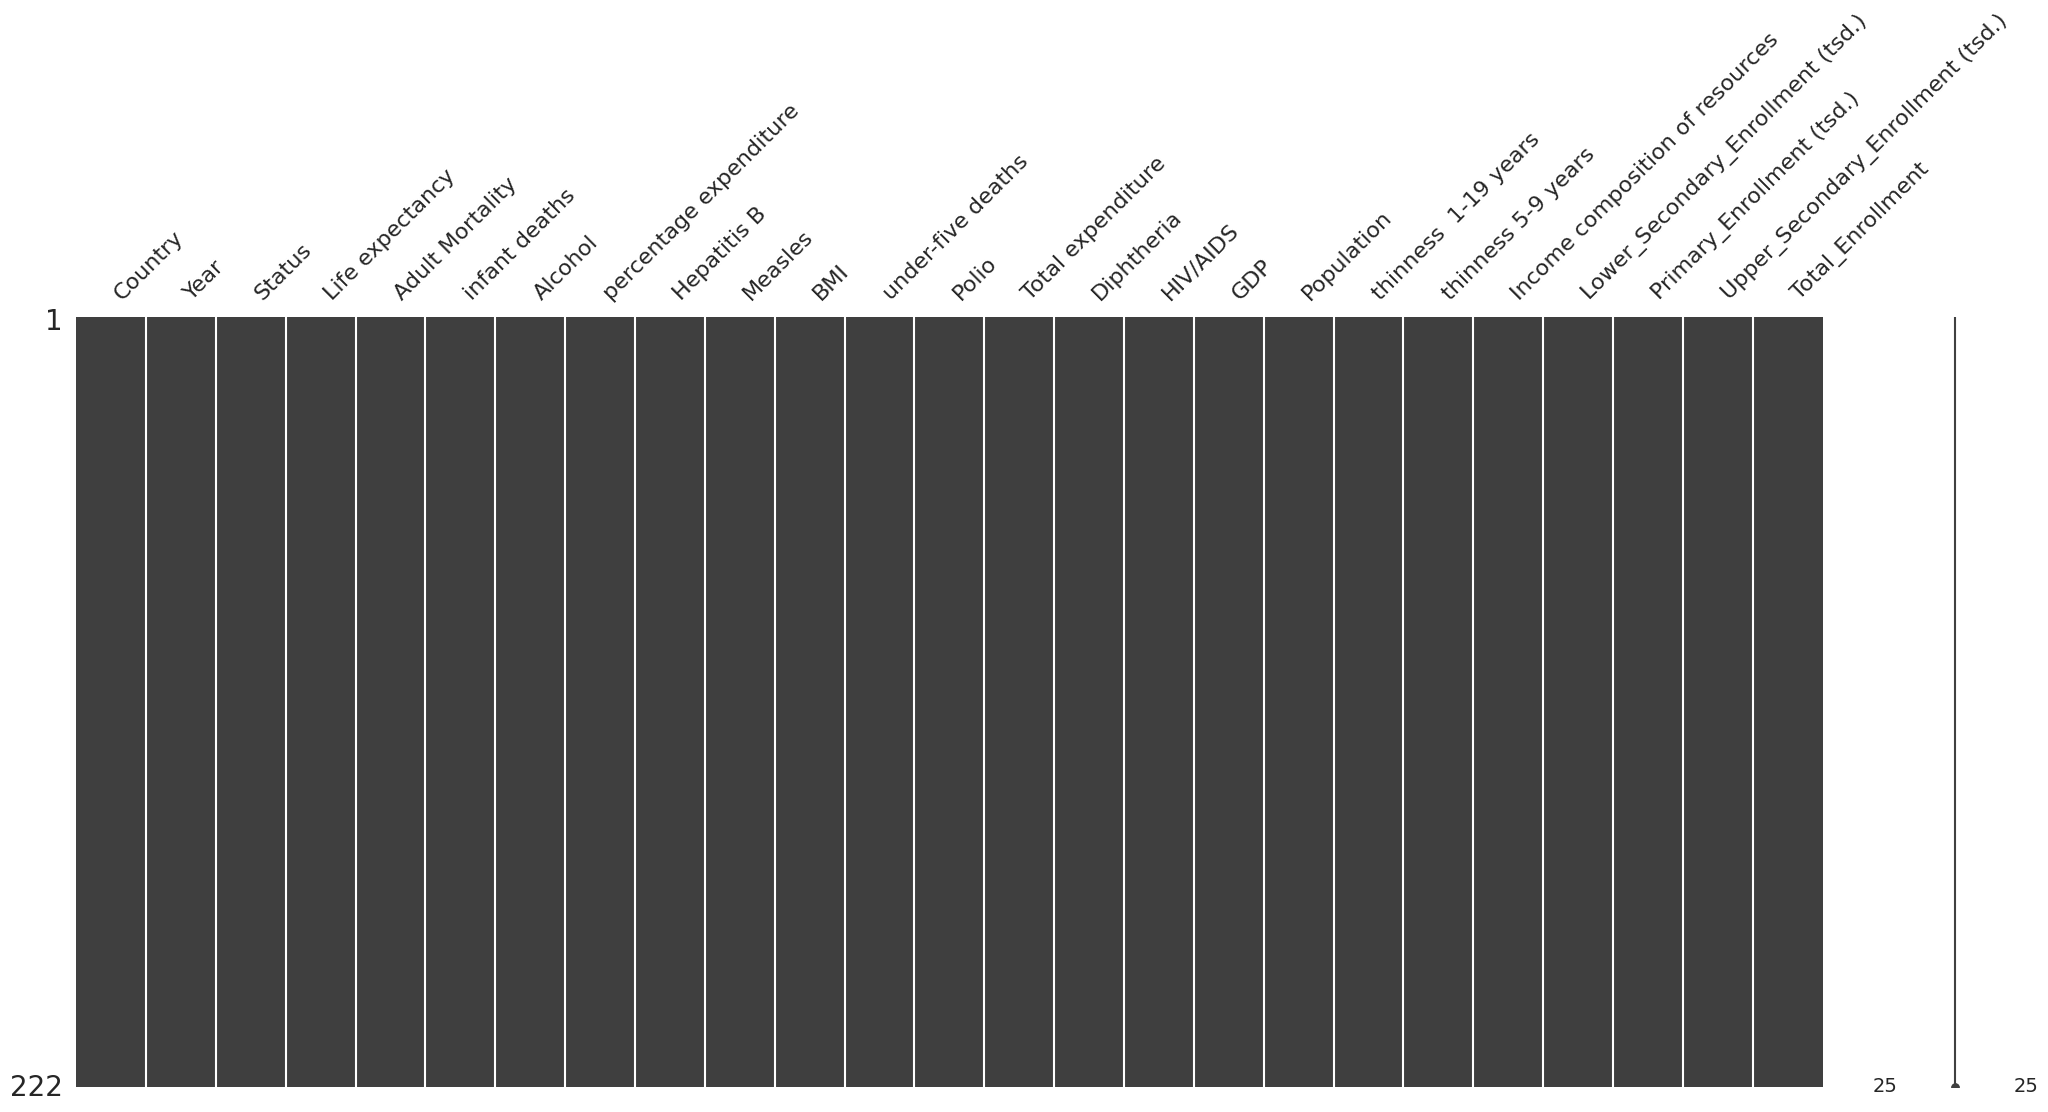

In [131]:
msno.matrix(merged_data)
save_path = os.path.join(plotfolder, "missing_data_matrix.png")
plt.savefig(save_path, dpi=300)
plt.show

We see above that the dataset we use has been succesfully cleaned in resprect to missing data and does not contain any missing or NaN values

/home/salah/Github/data-mining-projects/life-expectancy-data-analysis/venv/lib/python3.12/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/home/salah/Github/data-mining-projects/life-expectancy-data-analysis/venv/lib/python3.12/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<function matplotlib.pyplot.show(close=None, block=None)>

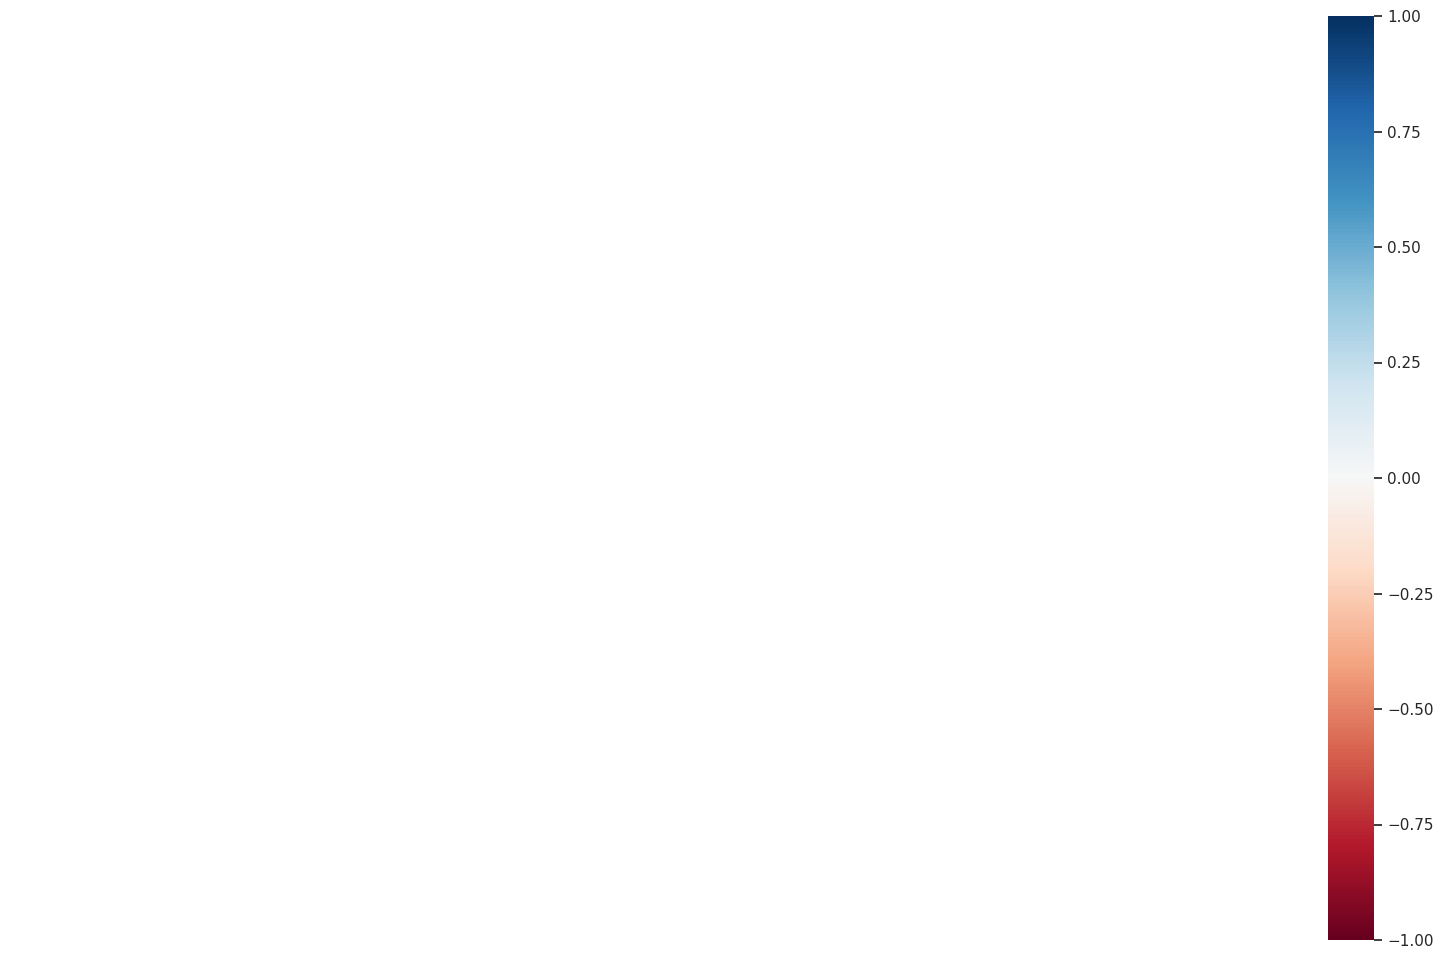

In [132]:
msno.heatmap(merged_data)
save_path = os.path.join(plotfolder, "missing_data_matrix_2.png")
plt.savefig(save_path, dpi=300)
plt.show

No missing values, columns are fully populated. So no further uses of msno needed! 

In [90]:
merged_data.columns = merged_data.columns.str.strip()

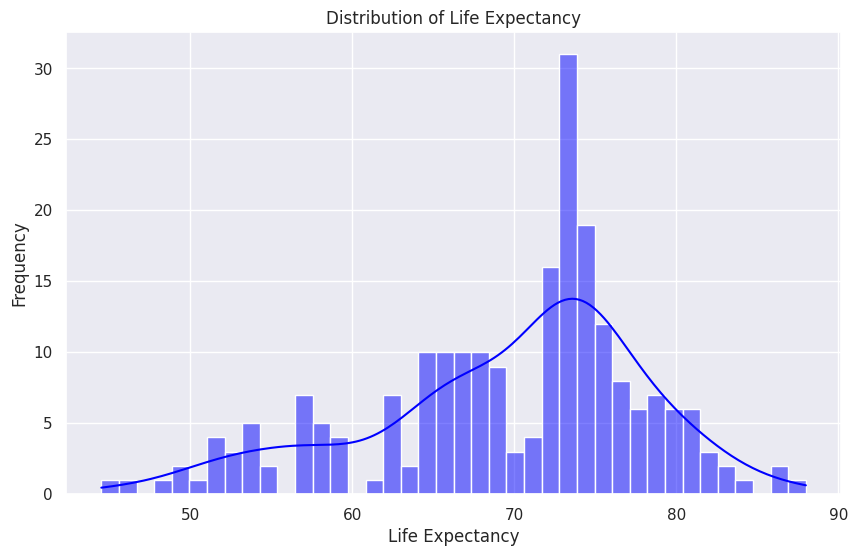

In [133]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_data["Life expectancy"], kde=True, bins=40, color='blue')
plt.title("Distribution of Life Expectancy")
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
save_path = os.path.join(plotfolder, "distribution_of_life_expectancy.png")
plt.savefig(save_path, dpi=300)
plt.show
plt.show()

/tmp/ipykernel_44155/2264564922.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_data["Life expectancy"], kde=False, fit=st.johnsonsu)


<function matplotlib.pyplot.show(close=None, block=None)>

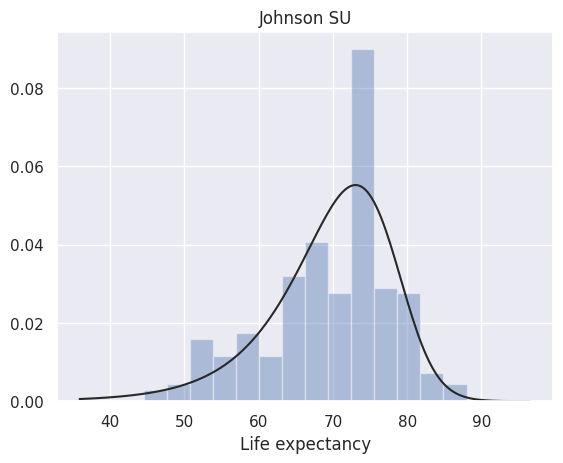

In [135]:
plt.figure(1)
plt.title('Johnson SU')
sns.distplot(merged_data["Life expectancy"], kde=False, fit=st.johnsonsu)
save_path = os.path.join(plotfolder, "Johnson_US_distribution.png")
plt.savefig(save_path, dpi=300)
plt.show


This distribution seems like a good candidate. The distribution might underestimate the peak around 70 but captures the tail on both sides.

/tmp/ipykernel_44155/2104549032.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_data["Life expectancy"], kde=False, fit=st.norm)


<function matplotlib.pyplot.show(close=None, block=None)>

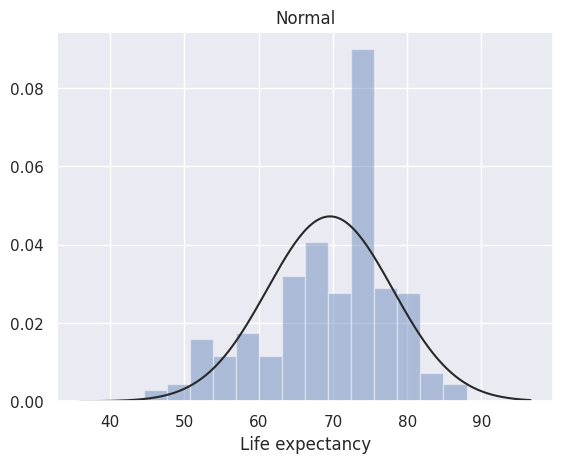

In [136]:
plt.figure(2)
plt.title('Normal')
sns.distplot(merged_data["Life expectancy"], kde=False, fit=st.norm)
save_path = os.path.join(plotfolder, "normal_distribution.png")
plt.savefig(save_path, dpi=300)
plt.show


The normal distribution doesn't fit perfectly. This can be observed on both sides and at 70.

/tmp/ipykernel_44155/234535561.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_data["Life expectancy"], kde=False, fit=st.lognorm)


<function matplotlib.pyplot.show(close=None, block=None)>

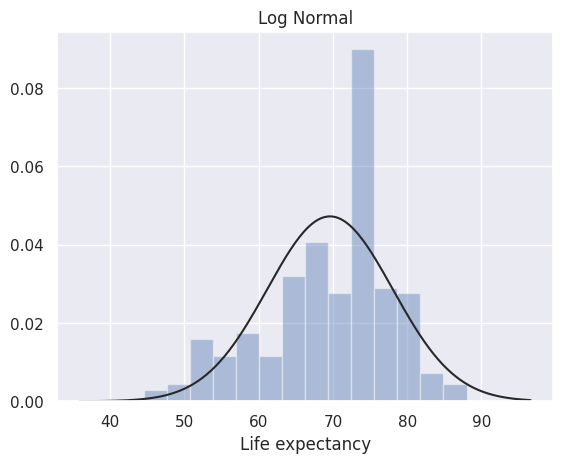

In [137]:
plt.figure(3)
plt.title('Log Normal')
sns.distplot(merged_data["Life expectancy"], kde=False, fit=st.lognorm)
save_path = os.path.join(plotfolder, "log_normal_distribution.png")
plt.savefig(save_path, dpi=300)
plt.show


The Log-Normal distribution does not to fit the life expectancy like the normal distribution. 

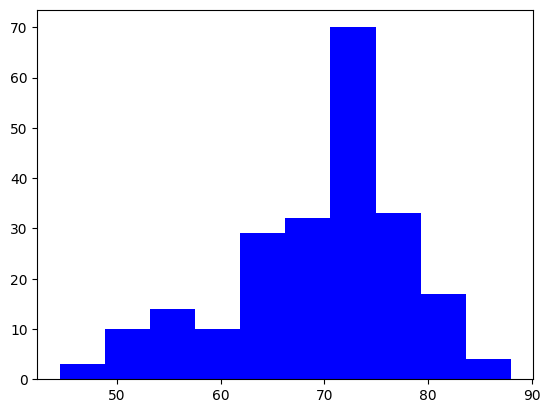

In [101]:
plt.hist(merged_data["Life expectancy"],orientation = 'vertical',histtype = 'bar', color ='blue')
plt.show()


### Finding correlation

### Correlation Heat Map

<function matplotlib.pyplot.show(close=None, block=None)>

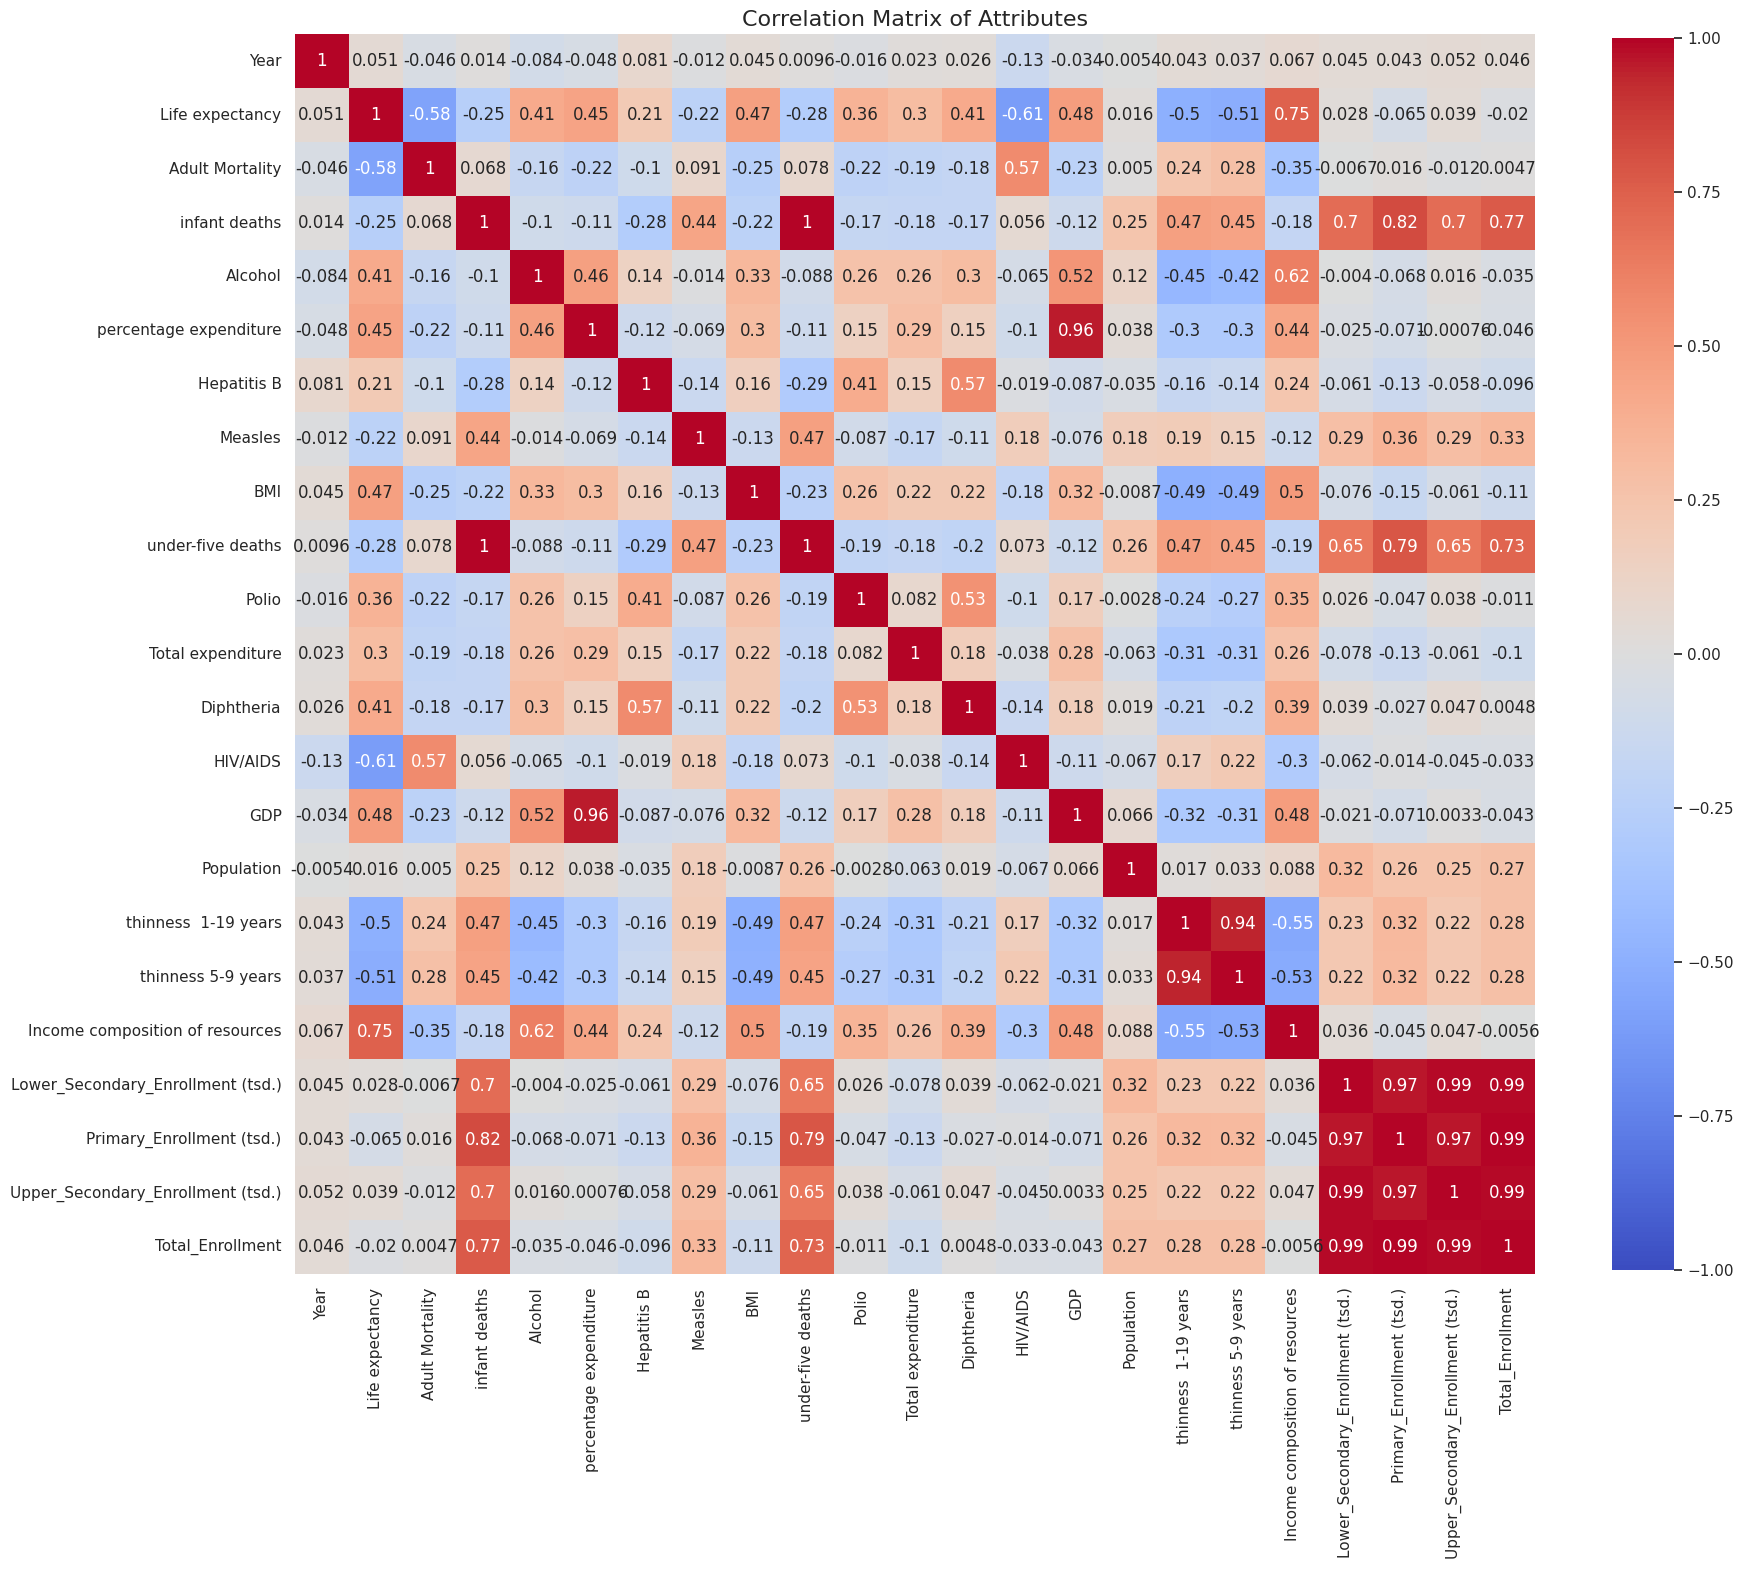

In [138]:
numeric_data = merged_data.select_dtypes(include=["float64", "int64"])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap="coolwarm",
            vmax=1,
            vmin=-1,
            square=True,
            cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Attributes', fontsize = 16)
save_path = os.path.join(plotfolder, "matrix_heatmap_numeric.png")
plt.savefig(save_path, dpi=300)
plt.show
plt.show

/home/salah/Github/data-mining-projects/life-expectancy-data-analysis/venv/lib/python3.12/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

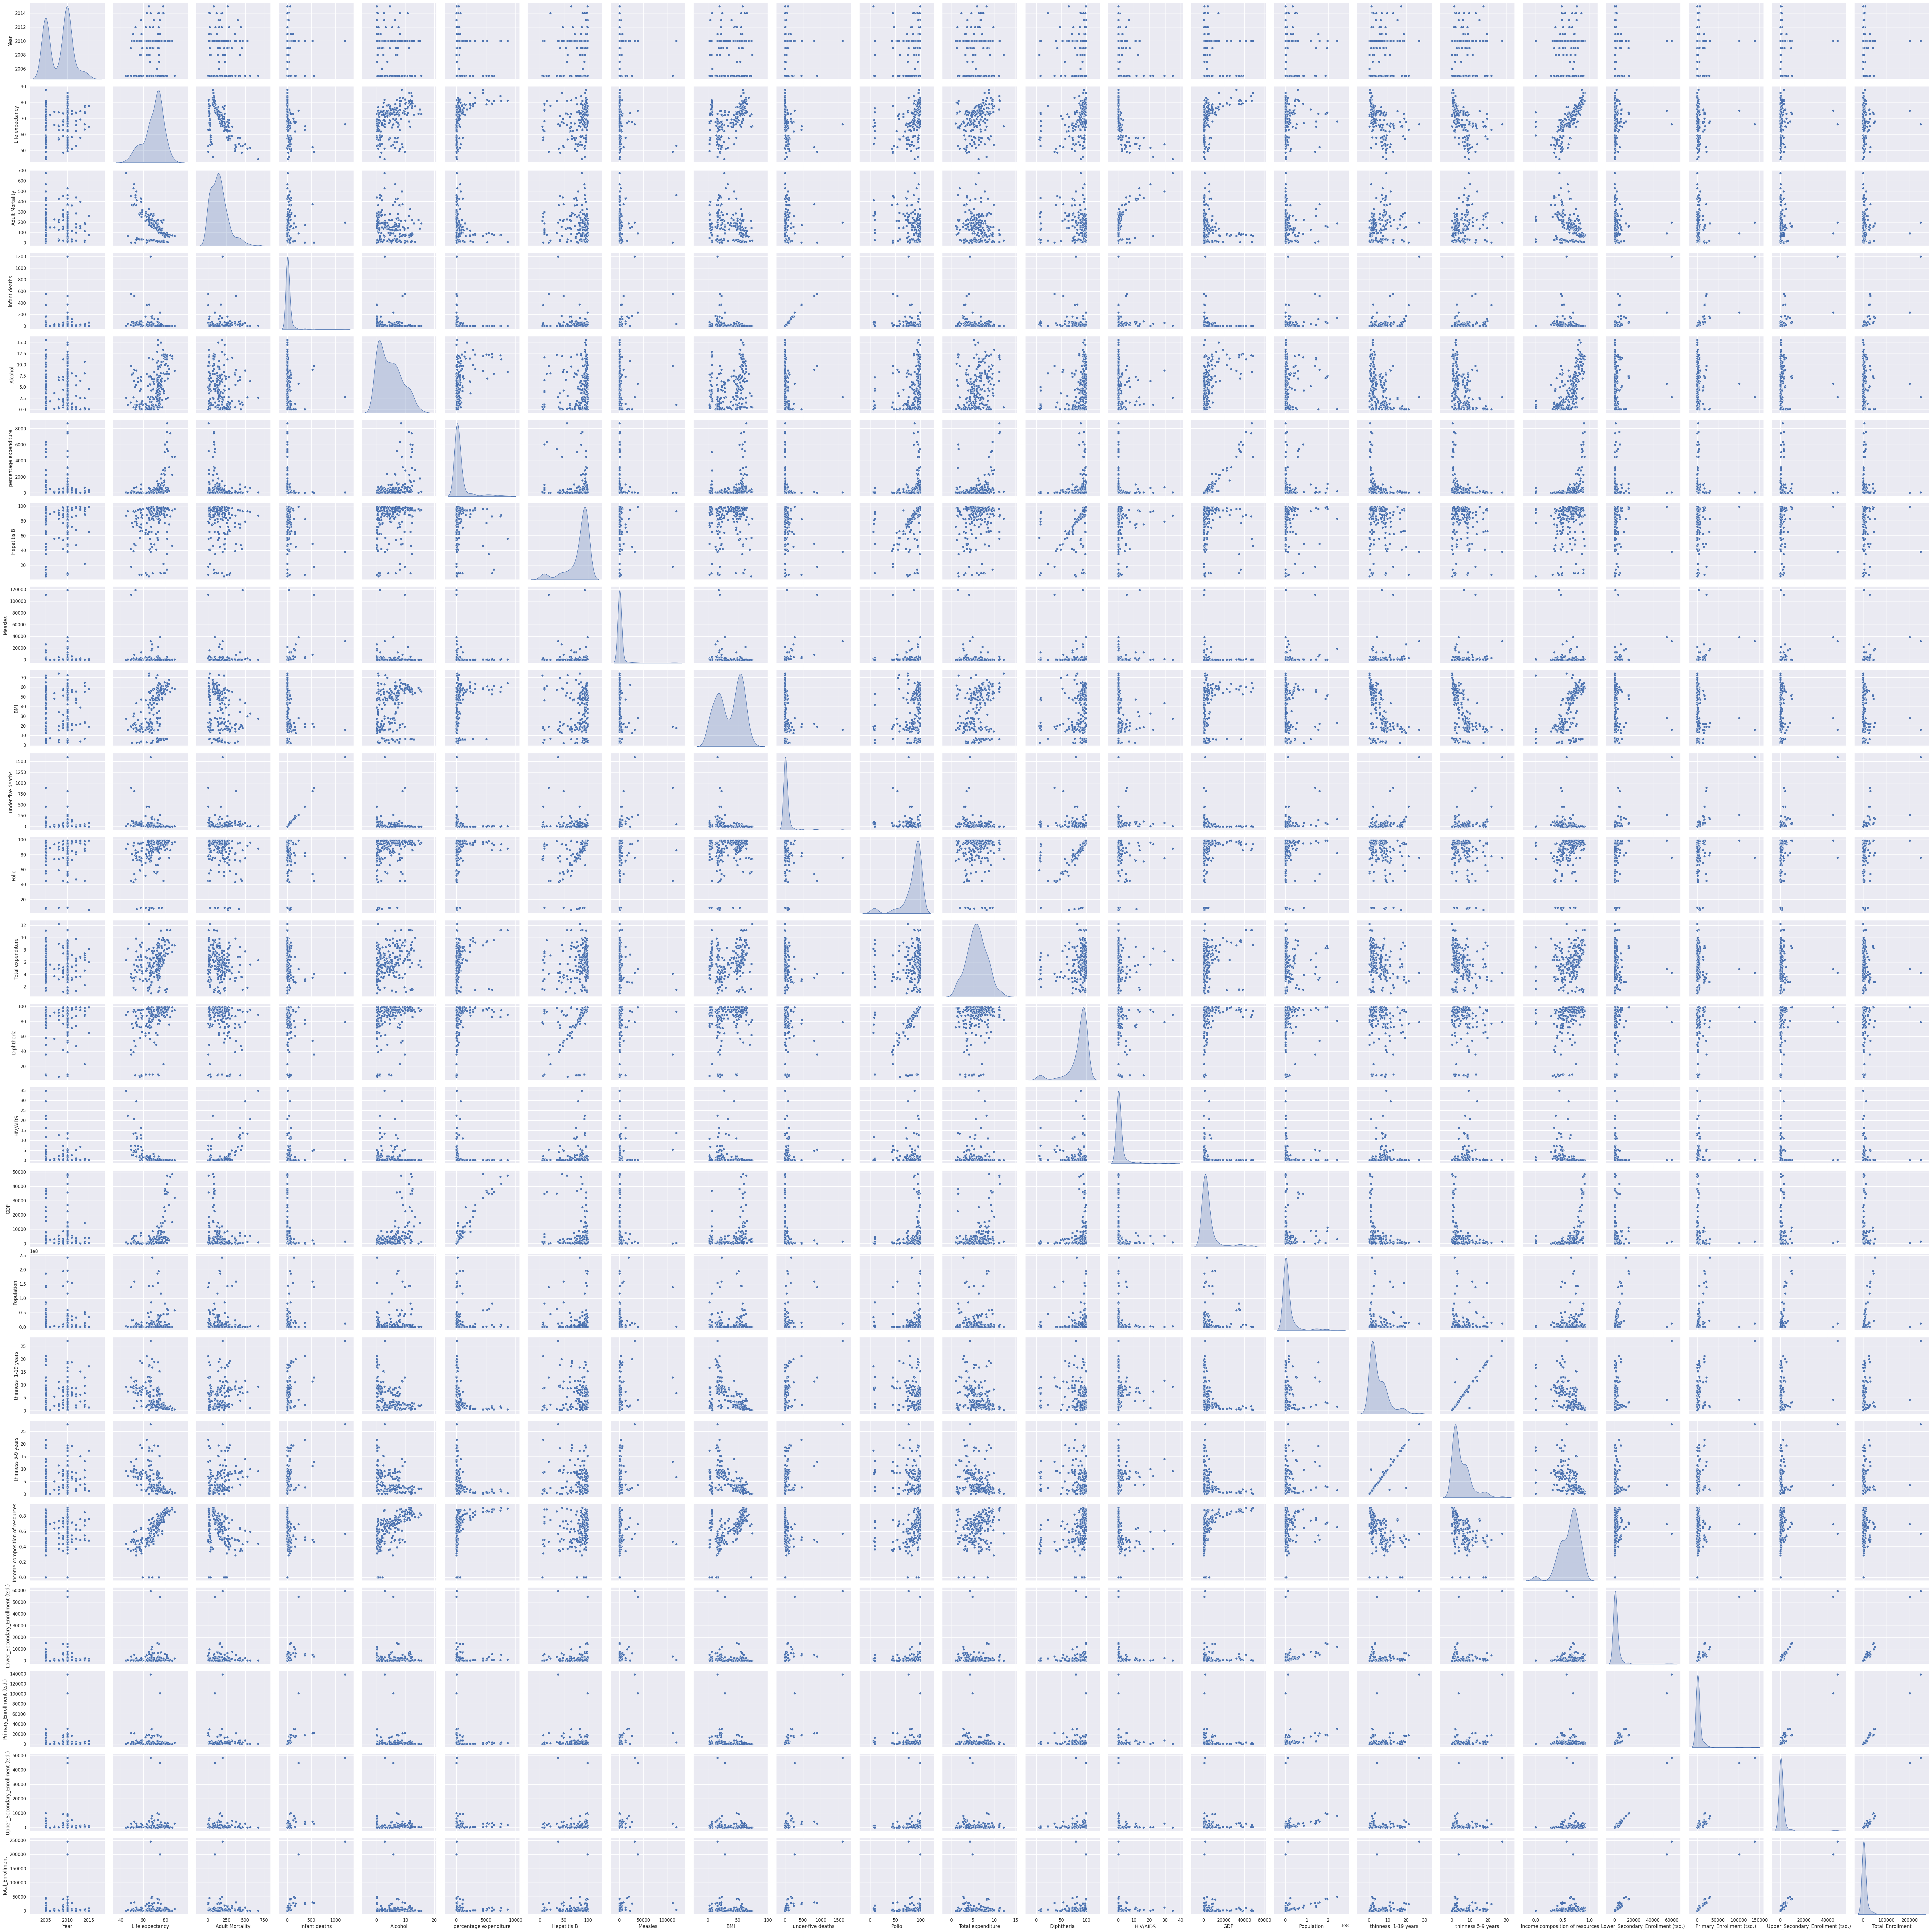

In [140]:
sns.set()
sns.pairplot(numeric_data, size=3, kind='scatter', diag_kind='kde')
save_path = os.path.join(plotfolder, "pairplot.png")
plt.savefig(save_path, dpi=300)
plt.show
plt.show

In [125]:
print(merged_data.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources',
       'Lower_Secondary_Enrollment (tsd.)', 'Primary_Enrollment (tsd.)',
       'Upper_Secondary_Enrollment (tsd.)', 'Total_Enrollment'],
      dtype='object')


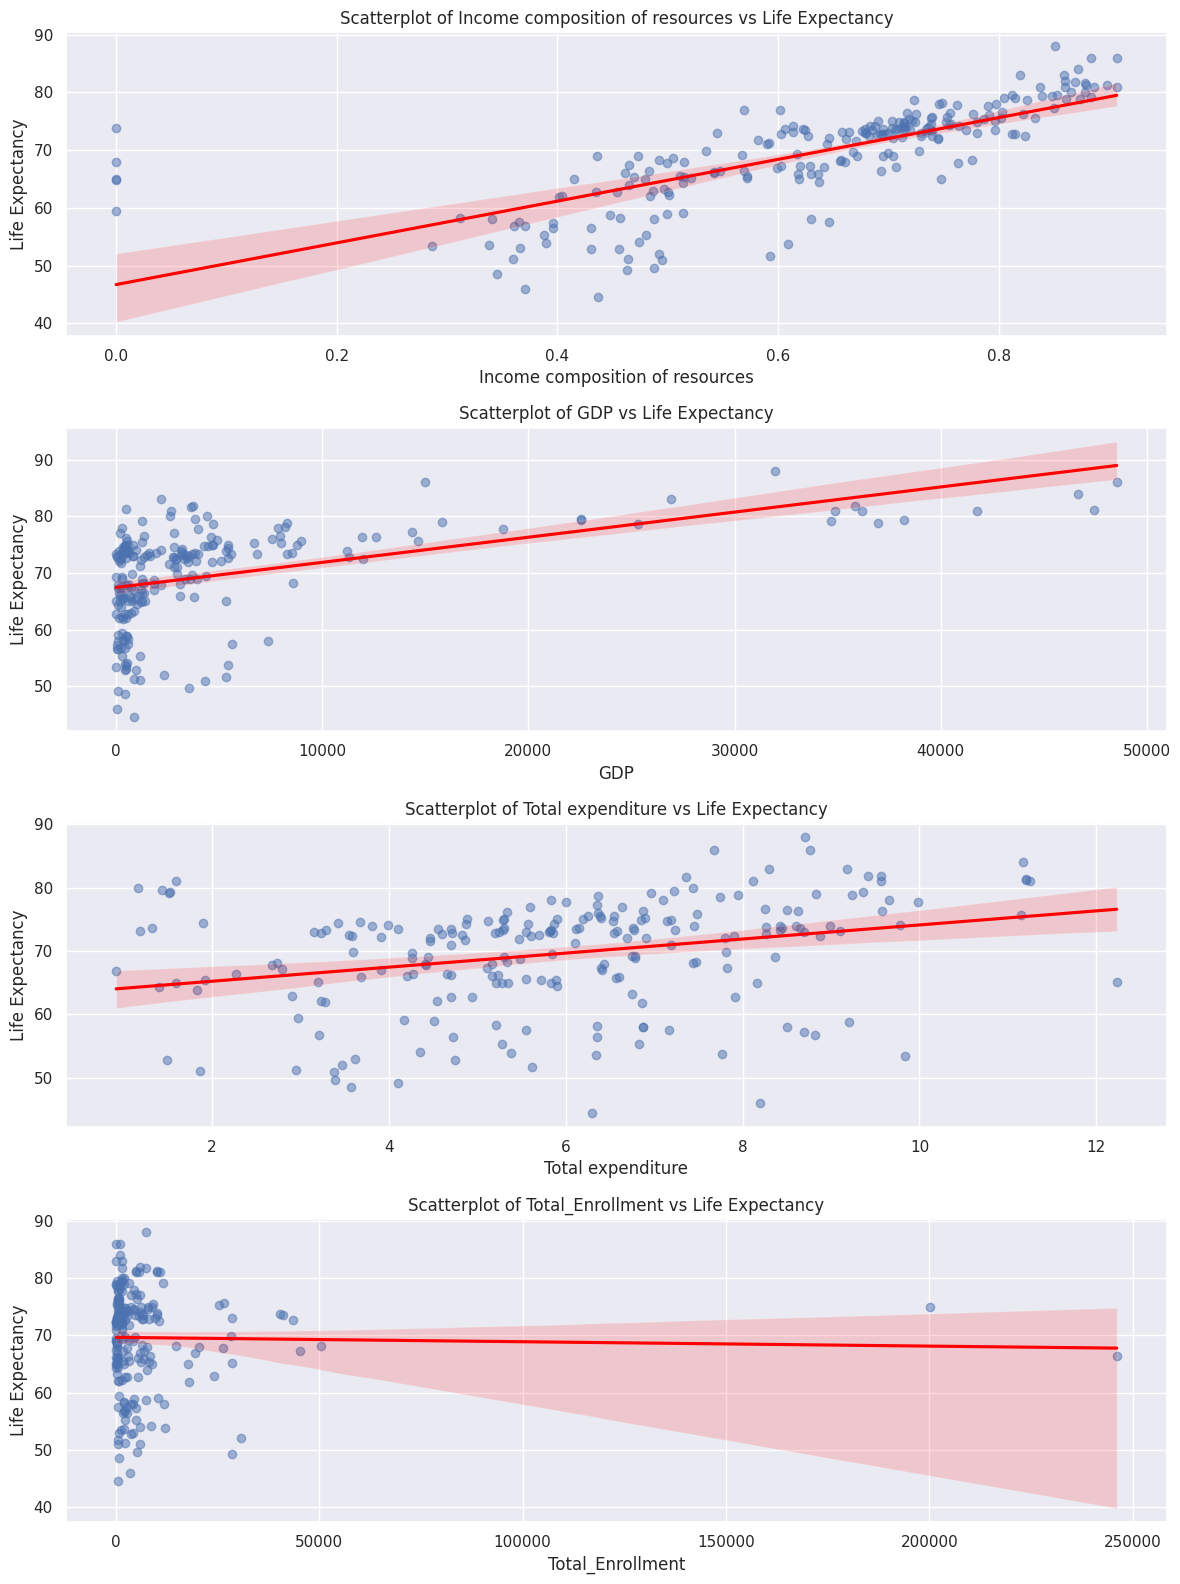

In [141]:

columns_to_plot = ["Income composition of resources", "GDP","Total expenditure" ,"Total_Enrollment"]

# Creating subplots
fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(12, len(columns_to_plot)*4))

# Here we cenerate scatterplots with regression lines
for i, column in enumerate(columns_to_plot):
    sns.regplot(
        x=merged_data[column], 
        y=merged_data["Life expectancy"], 
        ax=axes[i], 
        scatter_kws={"alpha": 0.5}, 
        line_kws={"color": "red"}
    )
    axes[i].set_title(f"Scatterplot of {column} vs Life Expectancy")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Life Expectancy")
    plot_filename = f"{column.replace(' ', '_').replace('/', '_').lower()}_vs_life_expectancy.png"
    save_path = os.path.join(plotfolder,plot_filename)
    plt.savefig(save_path, dpi=300)

plt.tight_layout()
plt.show()


Interpretation:
 
There is a strong positive linear relationship between the income composition of resources (a proxy for equitable distribution of income and resources) and life expectancy. 
As the income composition increases (from 0 to 1), life expectancy generally increases. This suggests that better income distribution and equitable access to resources are strongly associated with higher life expectancy.

There is aslo a moderate positive linear relationship between GDP and life expectancy.
As GDP increases, life expectancy tends to rise, but the relationship is less consistent compared to income composition.
Most countries are clustered at lower GDP values, but higher GDP countries generally show higher life expectancy. GDP is a contributing factor to life expectancy, likely because wealthier nations can invest more in healthcare, education, and infrastructure.

There is no clear relationship between total enrollment (in education) and life expectancy.
The regression line is flat or slightly negative, with a very wide confidence interval, suggesting high variability.
Many countries have low total enrollment but a wide range of life expectancy values, indicating that enrollment alone does not explain life expectancy trends.
Education might impact life expectancy indirectly through other pathways (e.g., economic growth, awareness, or healthcare access).

In [143]:
folder_name = "data/cleaned"
file_name = "merged_cleaned_data.csv"
save_path = os.path.join(folder_name,file_name)
if os.path.exists(folder_name):
    merged_data.to_csv(save_path, index=False)
    print(f"Files saved successfully to : {save_path}")
else:
    print(f"The folder '{folder_name}' does not exist!")

Files saved successfully to : data/cleaned/merged_cleaned_data.csv
